In [66]:
# Imports
import pandas
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter



In [67]:
# Load the txt files into a pandas dataframe
thorax1 = pandas.read_csv('data/thorax1.txt')
thorax2 = pandas.read_csv('data/thorax2.txt')
abdomen1 = pandas.read_csv('data/abdomen1.txt')
abdomen2 = pandas.read_csv('data/abdomen2.txt')
abdomen3 = pandas.read_csv('data/abdomen3.txt')


In [68]:
# Normalize the data to unit variance and zero mean
thorax1 = (thorax1 - thorax1.mean()) / thorax1.std()
thorax2 = (thorax2 - thorax2.mean()) / thorax2.std()
abdomen1 = (abdomen1 - abdomen1.mean()) / abdomen1.std()
abdomen2 = (abdomen2 - abdomen2.mean()) / abdomen2.std()
abdomen3 = (abdomen3 - abdomen3.mean()) / abdomen3.std()


In [69]:
# Filter out all signals to remove the baseline wander, which is 0.5Hz
cutoff_baseline = 0.5
fs = 1000
def highpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = lfilter(b, a, data)
    return y
thorax1 = highpass_filter(thorax1, cutoff_baseline, fs)
thorax2 = highpass_filter(thorax2, cutoff_baseline, fs)
abdomen1 = highpass_filter(abdomen1, cutoff_baseline, fs)
abdomen2 = highpass_filter(abdomen2, cutoff_baseline, fs)
abdomen3 = highpass_filter(abdomen3, cutoff_baseline, fs)

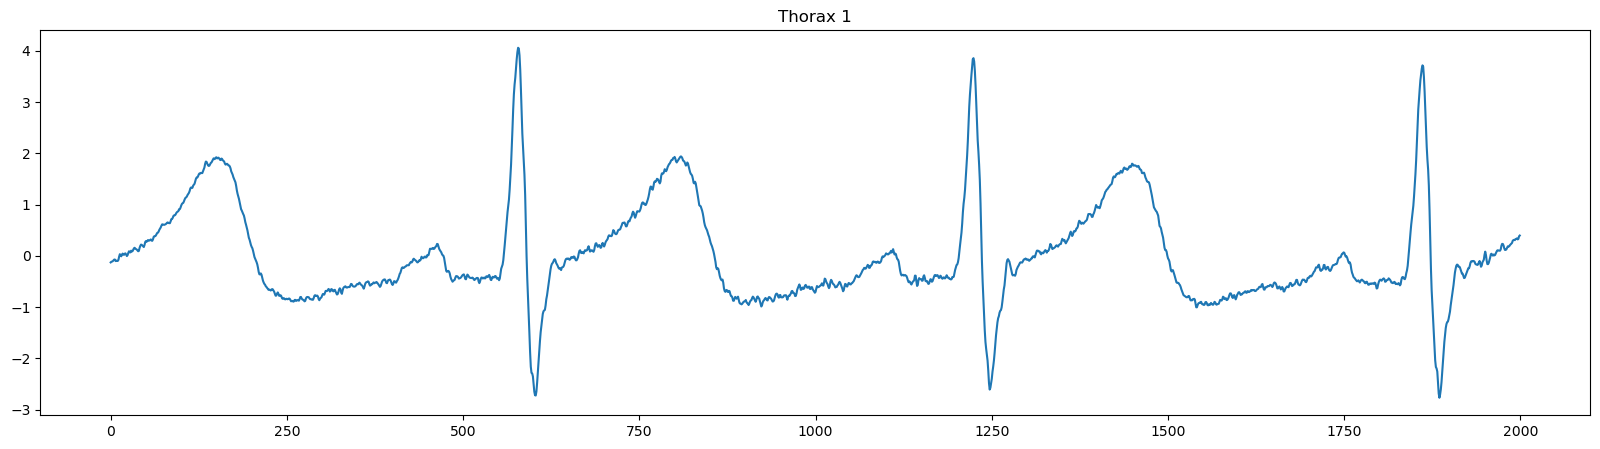

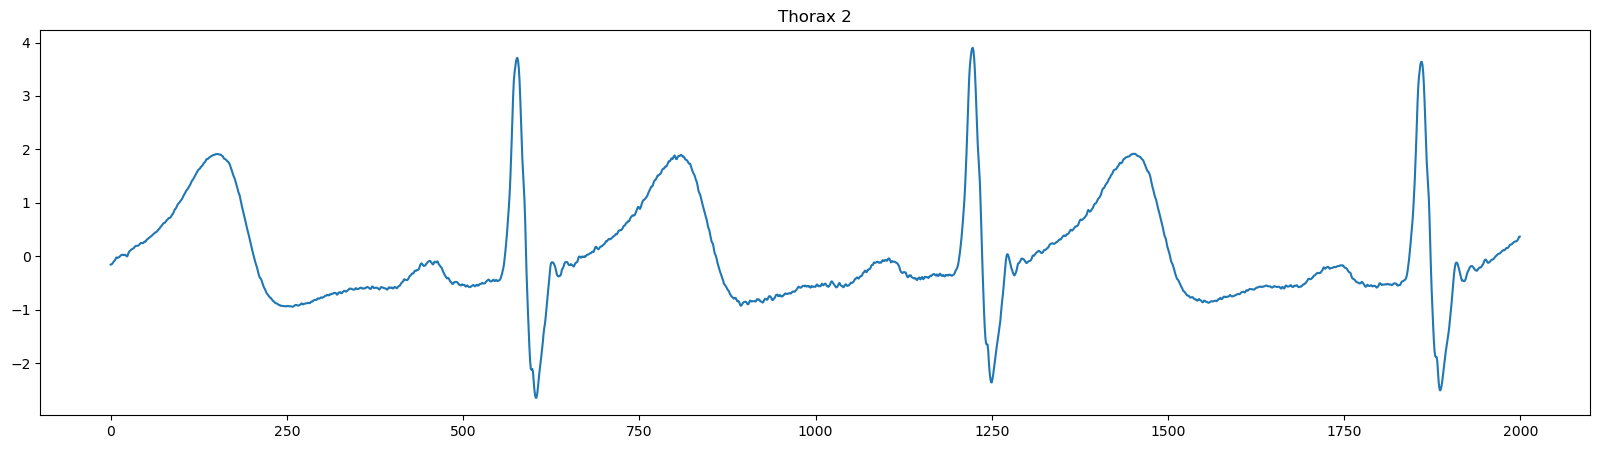

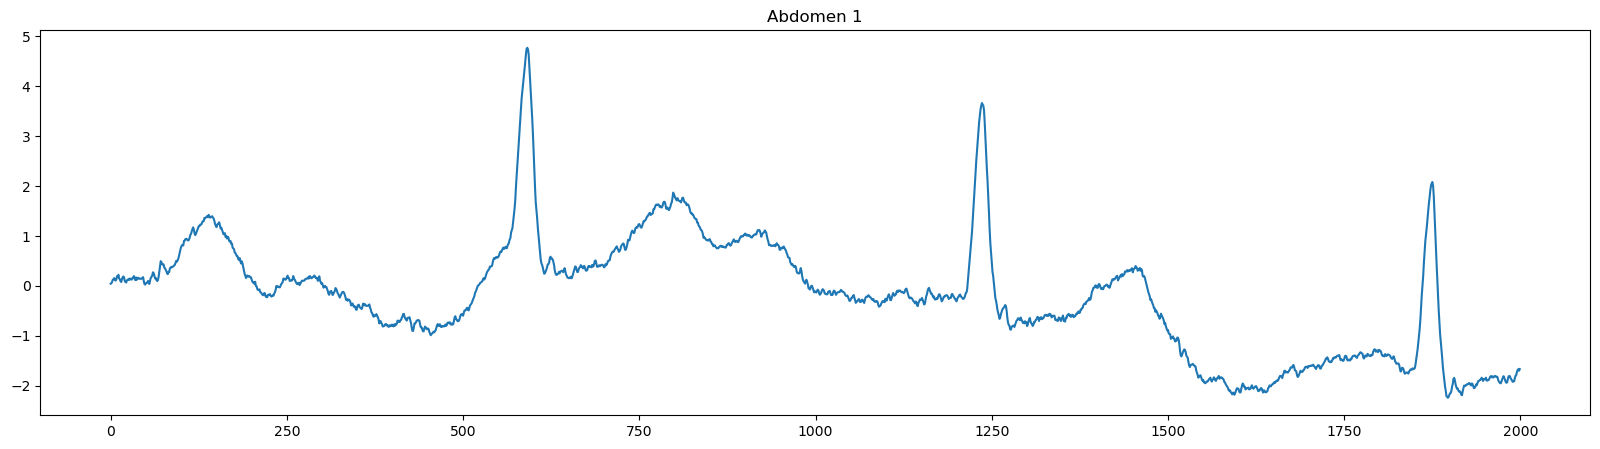

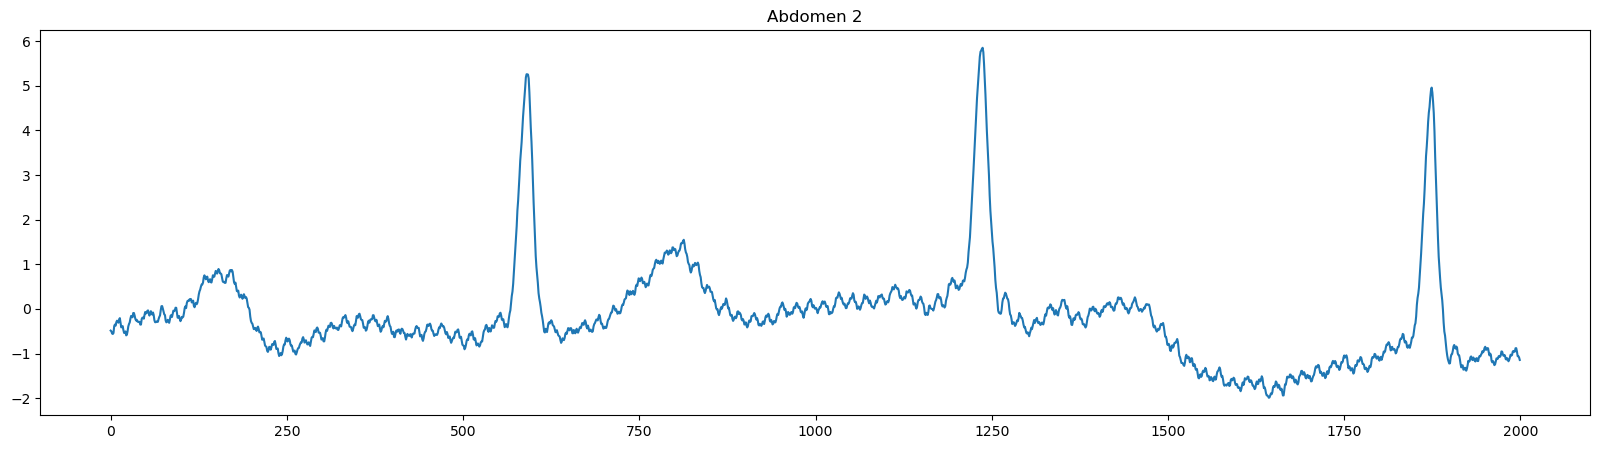

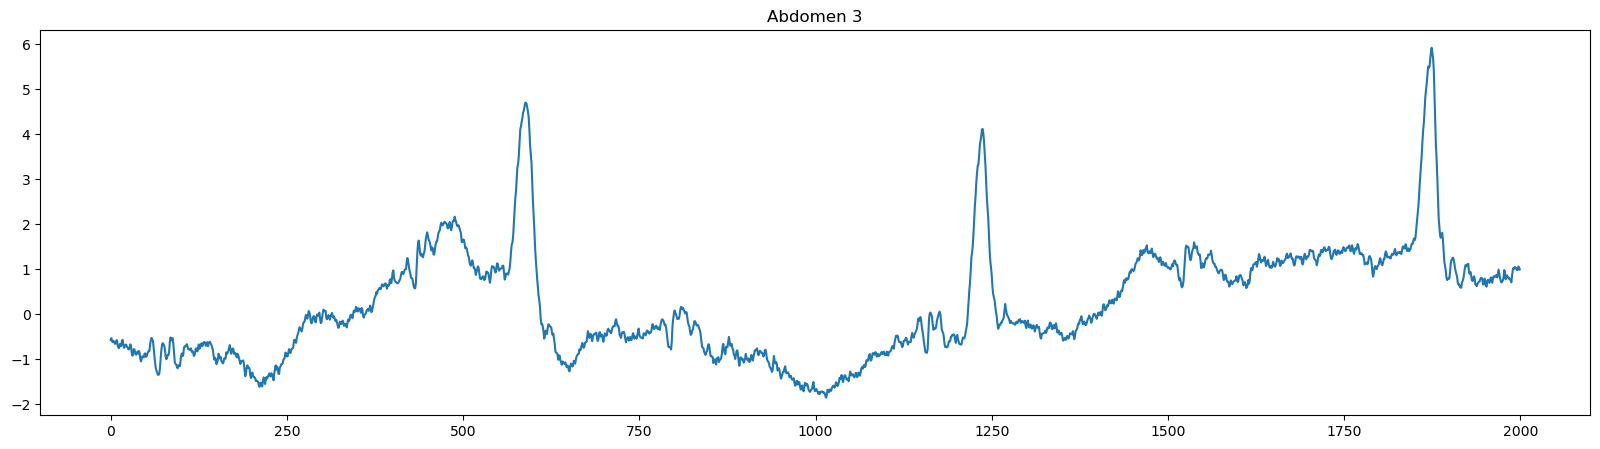

In [70]:
# Plot the data
plt.figure(figsize=(20,5))
plt.plot(thorax1[:2000], label='Thorax 1')
plt.title("Thorax 1")
plt.show()

plt.figure(figsize=(20,5))
plt.plot(thorax2[:2000], label='Thorax 2')
plt.title("Thorax 2")
plt.show()

plt.figure(figsize=(20,5))
plt.plot(abdomen1[:2000], label='Abdomen 1')
plt.title("Abdomen 1")
plt.show()

plt.figure(figsize=(20,5))
plt.plot(abdomen2[:2000], label='Abdomen 2')
plt.title("Abdomen 2")
plt.show()

plt.figure(figsize=(20,5))
plt.plot(abdomen3[:2000], label='Abdomen 3')
plt.title("Abdomen 3")
plt.show()